## Data Understanding
Im zweiten Schritt des CRISP-DM Modells werden sich die Daten genauer angeschaut. Das Ziel ist es hier, die verfügbaren Daten zu verstehen. So soll abgeschätzt werden, ob die verfügbaren Daten in der verfügbaren Qualität dem Problem gerecht werden.
Als erstes müssen die Daten eingelesen werden. Hierfür lässt sich das Python package `pandas` sehr gut verwenden.

In [3]:
import pandas as pd
import numpy as np

csv_data = pd.read_csv('data_set.csv', sep=',')

Im nächsten Schritt schauen wir uns den Datensatz erst einmal an.

In [4]:
csv_data.head()

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1
0,03/20/2013,132007717,03/20/2013,2015,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,OXFORD,OAKWOOD,"(34.0776, -118.308)"
1,03/10/2013,130608787,03/10/2013,445,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,ODIN ST,CAHUENGA BL,"(34.1113, -118.3336)"
2,12/18/2013,131820260,12/18/2013,745,18,Southeast,1839,997,TRAFFIC DR #,UNK,Unknown,105TH ST,CROESUS AV,"(33.9406, -118.2338)"
3,10/18/2013,131817514,10/18/2013,1730,18,Southeast,1827,997,TRAFFIC DR #,UNK,Unknown,101ST ST,JUNIPER ST,"(33.9449, -118.2332)"
4,05/26/2013,130510483,05/25/2013,2000,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,1300 W SEPULVEDA BL,NaN,"(33.8135, -118.2992)"


Wir sehen einen Datensatz, welcher die Kriminalitätsdaten von Los Angeles enthält.

## Data Preparation

### Data Selection

In diesem Fall ist von Feature Extraction abzusehen, da der vorliegende Datensatz aus einfachen Datentypen besteht. Gleichzeitig ermöglicht das Wissen über die Domäne eine effektive Auswahl der für die Zielfragestellung relevanten Attribute. Deswegen wird für die Data Selection die Feature Selection Methode verwendet. Hierfür gibt es zwei zentrale Methoden: das Entfernen irrelevanter Features und das Entfernen redundanter Features.

- Date.Rptd ist nicht relevant, da wir nach den Daten suchen, wann ein Verbrechen begangen wurde und diese Info bereits in DATE.OCC enthalten ist
- DATE.OCC und TIME.OCC stellen zusammen einen Timestamp dar
- AREA und AREA.NAME haben eine 1:1 Beziehung -> eine kann entfernt werden
- Crm.Cd und CrmCd.Desc stellen 1:1 Beziehung dar (Verbrechensnummer und Name) -> eine kann entfernt werden
- Fraglich auf welcher Abstraktionsebene die Lokation ausgewählt werden sollte: Area gibt guten Überblick, genaue Straßen bzw Koordinaten eventuell zu spezifisch, sodass Overfitting zustande kommt
- Status unwichtig

| Attribut      | Auswahl   | Potentielles Overfitting  | Alternativen  |
|---------------|-----------|---------------------------|---------------|
| Date.Rptd     | Nein      | Nein                      | DATE.OCC      |
| DR.NO	        | Nein      | Nein                      | -             |
| DATE.OCC      | Ja        | Ja                        | Date.Rptd     |
| TIME.OCC      | Ja        | Ja                        | -             |
| AREA          | Nein      | Nein                      | AREA.NAME     |
| AREA.NAME	    | Ja        | Nein                      | AREA          |
| RD            | Möglich   | -                         | -             |
| Crm.Cd        | Ja        | -                         | CrmCd.Desc    | 
| CrmCd.Desc    | Nein      | -                         | Crm.Cd        |
| Status        | Nein      | Nein                      | Status.Desc   |
| Status.Desc   | Nein      | Nein                      | Status        |
| LOCATION      | Möglich   | Ja                        | -             |
| Cross.Street  | Möglich   | Ja                        | -             |
| Location.1    | Möglich   | Ja                        | -             |

<br>

| Attribut      | Auswahl Begründung                                                                                                                        |
|---------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| Date.Rptd     | Irrelevant für Fragestellung, da wir nach dem Auftrittsdatum suchen und dieses besser durch DATE.OCC beschrieben werden kann              |  
| DR.NO	        | Irrelevant für Fragestellung, stellt eine ID für die Identifikation dar                                                                   |
| DATE.OCC      | Gibt tagesgenaue Dokumentierung des Auftreten des Verbrechens wieder, eventuell in Kombination mit TIME.OCC Overfitting                   |
| TIME.OCC      | Gibt minutengenaue Dokumentierung des Auftreten des Verbrechens wieder, eventuell Overfitting, wenn Zeitintervalle zu klein sind          |
| AREA          | ID für den Stadtbereich in LA, 1:1 Beziehung zu AREA.NAME; da Attribut kategorisch -> Verwendung des Namens                               |
| AREA.NAME	    | Name für den Stadtbereich in LA, 1:1 Beziehung zu AREA                                                                                    |
| RD            | Genaue Bedeutung des Attributes derzeit noch unbekannt, steht in n:1 Beziehung mit AREA, vermutlich also ortsbezogen                      |
| Crm.Cd        | ID des Verbrechenstyps, Verwendung der ID, da sich die Beschreibungen der Verbrechen nicht immer dieselben sind; Zielattribut             |
| CrmCd.Desc    | Name des Verbrechenstyps, n:1 Beziehung zu Crm.Cd                                                                                         |
| Status        | Code des Bearbeitungsstandes für das Verbrechen (gelöst, ungelöst etc.); irrelevant für die Fragestellung                                 |
| Status.Desc   | Beschreibung des Bearbeitungsstandes für das Verbrechen (gelöst, ungelöst etc.); irrelevant für die Fragestellung                         |
| LOCATION      | Straße, in welcher das Verbrechen gemeldet wurde; führt eventuell zu Overfitting; Eventuell nur zusammen mit AREA.NAME zur Identifikation |
| Cross.Street  | Kreuzende Straße zu LOCATION; nicht immer vorhanden; führt eventuell zu Overfitting                                                       |
| Location.1    | Koordinaten des aufgetretenen Verbrechens; hohes Risiko für Overfitting; Einfügen in Intervalle macht nicht immer Sinn                    |

In [5]:
csv_data[['DATE.OCC', 'TIME.OCC', 'AREA.NAME', 'CrmCd.Desc', 'RD']]
area_to_rd = {}
for tup in csv_data[['AREA.NAME', 'RD']].values:
    if not tup[0] in area_to_rd:
        area_to_rd[tup[0]] = set()
    area_to_rd[tup[0]].add(tup[1])

rd_to_area = {}
# Reverse mapping
for key in area_to_rd:
    for value in area_to_rd[key]:
        if not value in rd_to_area:
            rd_to_area[value] = set()
        rd_to_area[value].add(key)

print(rd_to_area)
# RD -> AREA is a n:1 mapping

{2049: {'Olympic'}, 2053: {'Olympic'}, 2054: {'Olympic'}, 2055: {'Olympic'}, 2056: {'Olympic'}, 2058: {'Olympic'}, 2062: {'Olympic'}, 2063: {'Olympic'}, 2064: {'Olympic'}, 2069: {'Olympic'}, 2071: {'Olympic'}, 2073: {'Olympic'}, 2074: {'Olympic'}, 2076: {'Olympic'}, 2079: {'Olympic'}, 2081: {'Olympic'}, 2083: {'Olympic'}, 2088: {'Olympic'}, 2091: {'Olympic'}, 2093: {'Olympic'}, 2097: {'Olympic'}, 2099: {'Olympic'}, 2000: {'Olympic'}, 2001: {'Olympic'}, 2002: {'Olympic'}, 2004: {'Olympic'}, 2005: {'Olympic'}, 2011: {'Olympic'}, 2013: {'Olympic'}, 2014: {'Olympic'}, 2015: {'Olympic'}, 2016: {'Olympic'}, 2017: {'Olympic'}, 2019: {'Olympic'}, 2021: {'Olympic'}, 2022: {'Olympic'}, 2023: {'Olympic'}, 2024: {'Olympic'}, 2025: {'Olympic'}, 2026: {'Olympic'}, 2027: {'Olympic'}, 2029: {'Olympic'}, 2031: {'Olympic'}, 2033: {'Olympic'}, 2034: {'Olympic'}, 2035: {'Olympic'}, 2036: {'Olympic'}, 2038: {'Olympic'}, 2039: {'Olympic'}, 2041: {'Olympic'}, 2042: {'Olympic'}, 2044: {'Olympic'}, 2045: {'Oly

- RD steht nicht für die Postleitzahl, möglich wäre die Speicherung ohne führende 9 und 0 also 91 -> 90091
- die herauskommenden Postleitzahlen würden dabei in der Tat im Großraum LA und San Diego liegen jedoch stimmen sie nicht mit den Straßen überein, auf denen Verbrechen begannen wurden

Welche Attribute final ausgewählt werden, wird im Verlauf des Modeling klarer, da aktuell unklar ist, ob bestimmte Orts- und Zeitausprägungen eher auf abstrakter oder konkreter Ebene benötigt werden.

#### Row Selection

Im nächsten Schritt wird evaluiert, ob das Verwenden aller Records sinnhaft ist. Möglich wäre z.B., dass sich die Verbrechensmengen oder Typen über die Zeit verändert haben. Aus diesem Grund analysieren wir im nächsten Schritt, die Menge an Verbrechen pro Jahr in einem Bezirk und die häufig auftretenden Verbrechen pro Jahr in einem bestimmten Bezirk. Falls es große Abweichungen gibt, ist es möglich, dass bestimmte Datensätze nicht zur Analyse verwendet werden sollten.

In [6]:
# Reformat the date from String to Date
data_for_selection = csv_data.copy()
data_for_selection['DATE.OCC'] = pd.to_datetime(data_for_selection['DATE.OCC'])
# Create a sorted table
data_sorted_by_date_occ = data_for_selection.sort_values(by='DATE.OCC')
data_sorted_by_date_occ.head()

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1
236841,01/02/2012,120204045,2012-01-01,330,2,Rampart,216,997,TRAFFIC DR #,IC,Invest Cont,SUNSET BL,ALVARADO BL,"(34.0776, -118.2635)"
237315,11/10/2012,121120767,2012-01-01,800,11,Northeast,1127,354,THEFT OF IDENTITY,IC,Invest Cont,6300 N FIGUEROA ST,NaN,"(34.1155, -118.1843)"
237316,11/11/2012,121120799,2012-01-01,1200,11,Northeast,1117,354,THEFT OF IDENTITY,IC,Invest Cont,4600 EAGLE ROCK BL,NaN,"(34.1275, -118.2179)"
237317,11/24/2012,121121441,2012-01-01,1,11,Northeast,1119,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",IC,Invest Cont,1100 COLORADO BL,NaN,"(34.1374, -118.1897)"
237318,11/30/2012,121121757,2012-01-01,800,11,Northeast,1142,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",IC,Invest Cont,4500 FRANKLIN AV,NaN,"(34.1054, -118.2874)"


In [7]:
data_sorted_by_date_occ.tail()

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1
985589,12/03/2016,161200991,2016-12-03,1530,12,77th Street,1273,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",IC,Invest Cont,9113 S WESTERN AV,NaN,"(33.9545, -118.309)"
1103082,12/04/2016,161617056,2016-12-03,1230,16,Foothill,1651,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",IC,Invest Cont,13342 KELOWNA ST,NaN,"(34.2483, -118.423)"
1129618,12/03/2016,160326483,2016-12-03,1500,3,Southwest,397,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,IC,Invest Cont,4331 S BUDLONG AV,NaN,"(34.0055, -118.2959)"
982791,12/04/2016,161822319,2016-12-03,1830,18,Southeast,1837,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),IC,Invest Cont,1772 E 111TH PL,NaN,"(33.9339, -118.2434)"
967568,12/04/2016,160128347,2016-12-03,1615,1,Central,153,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",IC,Invest Cont,219 W 7TH ST,NaN,"(34.0445, -118.2523)"


- Zeitreihe geht vom 01.01.2012 bis zum 03.12.2016

<Axes: title={'center': 'Amount of crimes committed per year and area in Los Angeles'}, xlabel='AREA.NAME'>

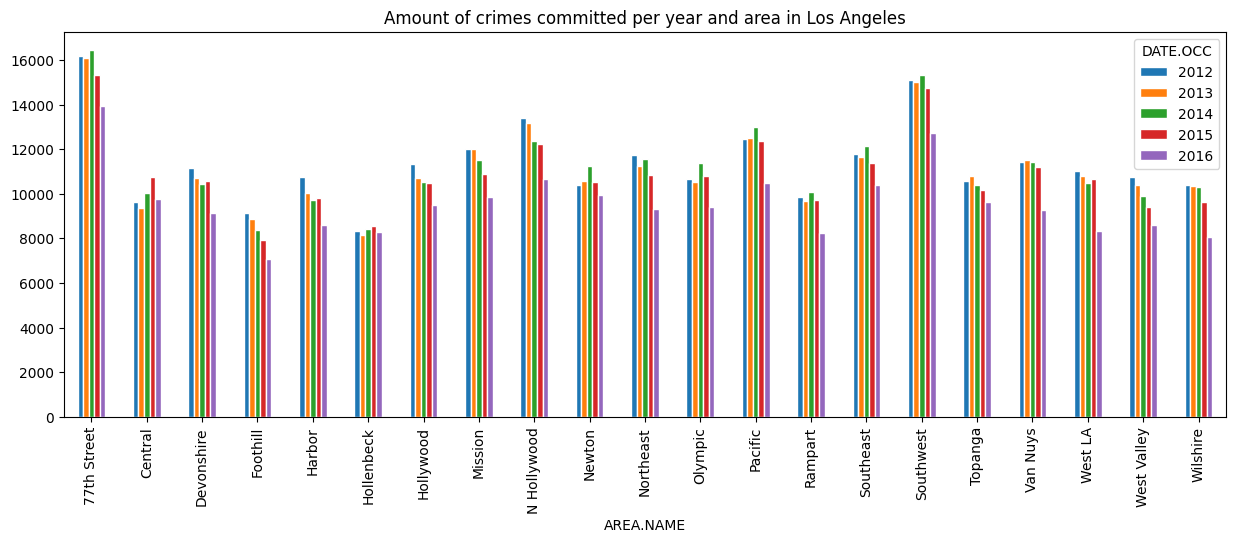

In [8]:
import datetime

# Create dataset with year instead of date
data_with_year = data_sorted_by_date_occ.copy()
data_with_year['DATE.OCC'] = data_with_year['DATE.OCC'].dt.year

only_date_and_area = data_with_year[['AREA.NAME','DATE.OCC','DR.NO']]
only_date_and_area.groupby(['AREA.NAME','DATE.OCC'])['DR.NO'].count().unstack('DATE.OCC').plot(kind='bar', title='Amount of crimes committed per year and area in Los Angeles', width=0.5, edgecolor='white', linewidth=1, figsize=(15, 5))


- auf dem Plot ist zu sehen, dass die Verbrechen über die Zeit rückläufig sind, jedoch in einem geringen Ausmaß
- auch zwischen den Städten keine großen Unterschiede, was den Trend betrifft

In [9]:
# for area in data_with_year['AREA.NAME'].unique():
#     data_in_this_area = data_with_year[(data_sorted_by_date_occ['AREA.NAME'] == area)]
#     # Group by area and crime and count  
#     data_in_this_area = data_in_this_area[['DATE.OCC','Crm.Cd','CrmCd.Desc', 'DR.NO']].groupby(['DATE.OCC','Crm.Cd'])['DR.NO'].count()
#     data_in_this_area.groupby(level=0, group_keys=False).nlargest(7).unstack(['Crm.Cd']).plot(kind='bar', title=f'Most committed crimes in {area} by year', width=0.5, edgecolor='white', linewidth=1, figsize=(15, 5))

- Grafik zeigt häufigsten Verbrechen in einem Jahr pro Stadtbezirk
- zwischen den Jahren keine sehr großen Abweichungen (manchmal fallen Straftaten raus, aber nur, weil sie aus der Top 7 raus sind)
- was sehr auffällig ist: das Vergehen TRAFFIC DR# mit dem Code 997 tritt in allen Jahren in allen Bezirken von 2012 bis 2015 am häufigsten auf
- ab 2016 fehlt es jedoch -> dabei steht dieses Vergehen für einen nicht besuchten Gerichtstermin nach einem Verkehrsverstoß (z.B. Überschreiten der Geschwindigkeit)

In [10]:
data_with_year[(data_with_year['Crm.Cd'] == 997) & (data_with_year['DATE.OCC'] >= 2016)]

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1


- Test zeigt: tatsächlich existiert dieser Datensatz für 2016 nicht
- es muss im Data Cleaning untersucht werden, was genau die Ursache hierfür ist
- um sicherzugehen, dass dieses Problem nicht für alle Daten vorliegt, wird im nächsten Schritt die Häufigkeit aller Straftaten pro Jahr tabellarisch gezeigt

In [11]:
from IPython.display import display, HTML

#display(HTML(data_with_year[['DATE.OCC','CrmCd.Desc','Crm.Cd','DR.NO']].groupby(['Crm.Cd','CrmCd.Desc','DATE.OCC']).count().to_html()))


- 903 starker Anstieg in 2015
- 930 in 2014 fast komplett weg
- 997 in 2016 komplett am Fehlen
- Fehlende Daten in Dez 2015 & 2016 (aus Beschreibung des Datensatzes)

- Rest der Daten 'in Ordnung'
- über die Zeit hat sich die Häufigkeit bestimmter Vergehen verändert aber alles im erwartbaren Bereich
- eine Möglichkeit wäre z.B., dass sich der Code verändert hat, allerdings werden die Ausschläge durch keines der anderen Werte ausgeglichen
- hierauf muss im Data Cleaning genauer eingegangen werden

- was außerdem auffällt: 2013 wurden viele Vergehen einmalig umbenannt, um dann im nächsten Jahr wieder die alten Kennzeichnungen zu verwenden

In [12]:
# Missing values
null_rows = csv_data[csv_data.isnull().any(axis=1)]
print(f'Total null rows: {len(null_rows)}')
without_cross_street = null_rows[null_rows['Cross.Street'].notnull()]
print(f'Cross.Street null values: {len(null_rows) - len(without_cross_street)}')
without_location = without_cross_street[without_cross_street['Location.1'].notnull()]
print(f'Location.1 null values: {len(without_cross_street) - len(without_location)}')
print(f'CrmCd.Desc null values: {len(without_location)}')

Total null rows: 820209
Cross.Street null values: 816574
Location.1 null values: 3565
CrmCd.Desc null values: 70


- Zusätzlich wurden fehlende Werte festgestellt
- genaue Ursachen werden in nächstem Abschnitt untersucht

### Data Cleaning
In diesem Abschnitt werden die Daten aufgeräumt. Dabei werden vor allem Datenformate der Rohdaten an Konventionen angepasst und gleichzeitig werden fehlende Einträge ersetzt bzw ergänzt. 

1. Format-Fixes
- die Spalten `Date.Rptd` und `DATE.OCC` enthalten Daten des Types `Date`, jedoch ist ihre Formatierung ungewöhnlich
- deshalb werden die Einträge zum Typ `Date` umgewandelt
- die Spalte `TIME.OCC` enthält einen String im folgenden Format: `HHMM`, wobei ein `Timestamp` eher so formatiert sein sollte: `HH:MM:SS`

In [13]:
# First: create a copy of the raw data
cleaned_data = csv_data.copy()

In [14]:
cleaned_data['Date.Rptd'] = pd.to_datetime(cleaned_data['Date.Rptd'])
cleaned_data['DATE.OCC'] = pd.to_datetime(cleaned_data['DATE.OCC'])

from datetime import time
def time_formatter(time_raw):
    time_raw_str = str(time_raw)
    if len(time_raw_str) <= 2:
        # It's 12am
        time_formatted = time(hour=0, minute=time_raw)
    else:
        type(len(time_raw_str)/2)
        time_formatted = time(hour=int(time_raw_str[:int(len(time_raw_str)/2)]), minute=int(time_raw_str[int(len(time_raw_str)/2):]))
    return time_formatted

cleaned_data['TIME.OCC'] = cleaned_data['TIME.OCC'].map(time_formatter)

- die Spalte `Location.1` enthält die Koordinaten des Verbrechens in einem String mit diesem Format: `(LAT, LONG)`
- dabei sollten `LAT` und `LONG` einzelne Spalten repräsentieren, da sie einen zusammengesetzten Wert repräsentieren

In [15]:
#cleaned_data[['LAT', 'LONG']] = cleaned_data['Location.1'].apply(lambda coordinates: pd.Series(str(coordinates).split(',')))
def lat_formatter(coordinate) :
    if len(str(coordinate).split(',')) > 1:
        return float(str(coordinate).split(',')[0].replace('(', ''))
    return None
cleaned_data['LAT'] = cleaned_data['Location.1'].map(lat_formatter)

def long_formatter(coordinate) :
    if len(str(coordinate).split(',')) > 1:
        return float(str(coordinate).split(',')[1].replace(')', ''))
    return None

cleaned_data['LONG'] = cleaned_data['Location.1'].map(long_formatter)
cleaned_data = cleaned_data.drop(columns=['Location.1'])
cleaned_data

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,LAT,LONG
0,2013-03-20,132007717,2013-03-20,20:15:00,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,OXFORD,OAKWOOD,34.0776,-118.3080
1,2013-03-10,130608787,2013-03-10,04:45:00,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,ODIN ST,CAHUENGA BL,34.1113,-118.3336
2,2013-12-18,131820260,2013-12-18,07:45:00,18,Southeast,1839,997,TRAFFIC DR #,UNK,Unknown,105TH ST,CROESUS AV,33.9406,-118.2338
3,2013-10-18,131817514,2013-10-18,17:30:00,18,Southeast,1827,997,TRAFFIC DR #,UNK,Unknown,101ST ST,JUNIPER ST,33.9449,-118.2332
4,2013-05-26,130510483,2013-05-25,20:00:00,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,1300 W SEPULVEDA BL,NaN,33.8135,-118.2992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136584,2016-05-01,162010003,2016-04-30,22:00:00,20,Olympic,2069,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",IC,Invest Cont,1155 ELDEN AV,NaN,34.0508,-118.2877
1136585,2016-06-29,160315990,2016-06-29,10:20:00,3,Southwest,353,946,OTHER MISCELLANEOUS CRIME,IC,Invest Cont,3745 S VICTORIA AV,NaN,34.0199,-118.3363
1136586,2016-05-01,161200696,2016-05-01,20:30:00,12,77th Street,1256,626,SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT,IC,Invest Cont,943 W 75TH ST,NaN,33.9717,-118.2893
1136587,2016-09-05,161015111,2016-09-05,08:00:00,10,West Valley,1017,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,Invest Cont,7545 BALBOA BL,NaN,34.2067,-118.5014


- weiterhin haben Einträge der Spalten `LOCATION` und `Cross.Street` zu viele Leerzeichen
- hier müssen überflüssige Leerzeichen entfernt werden

In [16]:
def remove_whitespaces(street_name):
    street_name = ' '.join(str(street_name).strip().split())
    if street_name == 'nan':
        return None
    return street_name

cleaned_data['LOCATION'] = cleaned_data['LOCATION'].map(remove_whitespaces)
cleaned_data['Cross.Street'] = cleaned_data['Cross.Street'].map(remove_whitespaces)

2. Missing Values

- es wurde bereits festgestellt, dass einige Daten fehlen
- bei der Spalte `Cross.Street` fehlen unter ca. 1136000 Daten 816574
- eine Untersuchung der betroffenen Einträge mit den Koordinaten hat ergeben, dass diese Werte `Completely missing at random (MCAR)` sind, da einige Einträge in der Nähe einer Kreuzung sind und wiederrum andere nicht
- Werte könnten theoretisch durch die Koordinaten ersetzt werden
- dies wäre jedoch relativ aufwendig und da die Werte MCAR sind, kann es auch sein, dass der Wert `Cross.Street` mit Absicht Missing ist, da das Verbrechen nicht in der Nähe einer Kreuzung passiert ist
- es empfiehlt sich also, die Werte von `Cross.Street` für die Analyse gänzlich zu ignorieren, da die Qualität der Daten hier zu schlecht ist

In [17]:
cleaned_data.sort_values(by=['LAT', 'LONG'])

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,LAT,LONG
328,2012-12-31,120630653,2012-12-31,13:00:00,6,Hollywood,622,330,BURGLARY FROM VEHICLE,IC,Invest Cont,MULHOLLAND DR,LAUREL,0.0,0.0
351,2012-12-31,120818974,2012-12-31,15:35:00,8,West LA,889,997,TRAFFIC DR #,IC,Invest Cont,GUTHERIE AV,SHERBOURNE DR,0.0,0.0
385,2012-12-31,121228697,2012-12-31,01:30:00,12,77th Street,1243,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",IC,Invest Cont,61ST ST,WESTERN AV,0.0,0.0
402,2012-12-31,121324820,2012-12-31,15:15:00,13,Newton,1341,997,TRAFFIC DR #,AA,Adult Arrest,BROADWAY,MLK,0.0,0.0
506,2013-01-01,130304031,2012-12-31,23:30:00,3,Southwest,331,330,BURGLARY FROM VEHICLE,IC,Invest Cont,2600 WEST VIEW ST,None,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707049,2014-09-07,142115167,2014-09-07,02:00:00,21,Topanga,2157,626,SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT,AA,Adult Arrest,DE SOTO,WINNETKA,NaN,NaN
707106,2014-09-04,141220122,2014-08-31,19:30:00,12,77th Street,1232,946,OTHER MISCELLANEOUS CRIME,IC,Invest Cont,5800 WEST BL,None,NaN,NaN
707150,2014-08-30,141220805,2014-08-16,20:00:00,12,77th Street,1211,922,CHILD STEALING,IC,Invest Cont,5100 WEST BL,None,NaN,NaN
707213,2014-08-11,140712536,2014-08-11,17:10:00,7,Wilshire,724,997,TRAFFIC DR #,IC,Invest Cont,BEVERLY,GROVE,NaN,NaN


- einige Koordinaten sind (0, 0) -> diese fehlen auch!

In [18]:
def zero_to_null_mapper(x):
    if x == 0:
        return None
    return x

cleaned_data['LAT'] = cleaned_data['LAT'].map(zero_to_null_mapper)
cleaned_data['LONG'] = cleaned_data['LONG'].map(zero_to_null_mapper)
#cleaned_data[(cleaned_data['LAT'].isnull() | cleaned_data['LONG'].isnull()) & cleaned_data['Status'] == 'IC']
#cleaned_data[cleaned_data['Status'] == 'IC']
cleaned_data[(cleaned_data['LAT'].isnull() | cleaned_data['LONG'].isnull()) & cleaned_data['Cross.Street'].notnull()]

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,LAT,LONG
147,2014-05-21,141100729,2014-05-21,05:20:00,11,Northeast,1153,122,"RAPE, ATTEMPTED",IC,Invest Cont,LOS FELIZ,FERNDALE,NaN,NaN
157,2014-05-07,141810318,2014-05-07,17:45:00,18,Southeast,1805,997,TRAFFIC DR #,IC,Invest Cont,93 ST,AVALON,NaN,NaN
203,2014-09-06,141422705,2014-09-06,09:40:00,14,Pacific,1493,997,TRAFFIC DR #,IC,Invest Cont,VISTA DEL MAR,HESPERIAN WY,NaN,NaN
328,2012-12-31,120630653,2012-12-31,13:00:00,6,Hollywood,622,330,BURGLARY FROM VEHICLE,IC,Invest Cont,MULHOLLAND DR,LAUREL,NaN,NaN
351,2012-12-31,120818974,2012-12-31,15:35:00,8,West LA,889,997,TRAFFIC DR #,IC,Invest Cont,GUTHERIE AV,SHERBOURNE DR,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134694,2016-10-16,161225567,2016-10-16,11:50:00,12,77th Street,1203,210,ROBBERY,IC,Invest Cont,WESTERN AV,45TH ST,NaN,NaN
1135110,2016-02-05,161805832,2016-02-05,16:45:00,18,Southeast,1838,624,BATTERY - SIMPLE ASSAULT,IC,Invest Cont,SANTA ANA N,WILLOWBROOK,NaN,NaN
1135219,2016-10-11,160621569,2016-10-11,17:55:00,6,Hollywood,678,762,LEWD CONDUCT,IC,Invest Cont,HARVARD AV,LEMON GROVE AV,NaN,NaN
1135533,2016-10-31,160622780,2016-10-30,17:45:00,6,Hollywood,637,330,BURGLARY FROM VEHICLE,IC,Invest Cont,CARLOS AV,BRONSON AV,NaN,NaN


- zusammen mit den (0,0) Koordinaten fehlen insgesamt für 13011 Einträge die Koordinaten
- auffällig: für alle diese Einträge steht der Status `IC`
- allerdings: insgesamt haben 916146 Einträge den Status `IC` (über 80%)
- Wahrscheinlichkeit ist also hoch, dass das einfach Zufall ist
- damit sind diese Daten ebenfalls `MCAR`
- diese Daten könnten jedoch zumindest teilweise gerettet werden
- so könnte das Tupel (`LOCATION`,`Cross.Street`) genutzt werden, um die Koordinaten vorherzusagen
- kommt jedoch darauf an, wie viele Doppelungen der Tupel es gibt
- zuletzt wurden auch einige fehlende Daten in der Spalte `CrmCd.Desc` festgestellt

In [19]:
set(cleaned_data[cleaned_data['CrmCd.Desc'].isnull()]['Crm.Cd'].values)

{760, 814, 822, 921}

- dabei handelt es sich um diese vier Verbrechenscodes: 760, 814, 822, 921
- für keiner dieser Codes existiert ein `CrmCd.Desc` in der Tabelle, weshalb davon auszugehen ist, dass diese Werte `Nonignorable` sind
- da dies jedoch nur 70 Einträge betrifft, ist davon auszugehen, dass dies Nischenverbrechen sind, weshalb diese in der Auswertung sowieso nur eine geringe Relevanz hätten
- dennoch können die Daten behalten werden, da davon auszugehen ist, dass Recherchen die genauen Verbrechensdefinitionen hervorbringen könnten

In [20]:
# Test data range
print(min(cleaned_data['LAT'].to_list()))
print(max(cleaned_data['LAT'].to_list()))
print(min(cleaned_data['LONG'].to_list()))
print(max(cleaned_data['LONG'].to_list()))

33.3427
34.8087
-118.8551
-117.6596


- Datenbereiche für Koordinaten normal

3. Ersetzen fehlender Daten
- wie bereits besprochen wurde, wird darauf verzichtet Daten mit fehlender `Cross.Street` zu ersetzen
- bei den Koordinaten wird versucht, die Daten zu ersetzen, indem Daten mit gleicher Kreuzung verwendet werden

In [21]:
# List of lists with (LOCATION, Cross.Street, LAT, LONG)
loc_coordinate_list = cleaned_data[['LOCATION','Cross.Street','LAT','LONG']].values
import math

# Map (street1,street2): [(LAT,LONG)]
loc_to_coordinate_map = {}
for i in range(0, len(loc_coordinate_list)):
    loc = loc_coordinate_list[i]
    if None in loc or math.isnan(loc[2]) or math.isnan(loc[3]):
        continue
    if len(loc[0]) < len(loc[1]):
        street1 = loc[0]
        street2 = loc[1]
    else:
        street2 = loc[0]
        street1 = loc[1]
    if not (street1,street2) in loc_to_coordinate_map:
        loc_to_coordinate_map[(street1,street2)] = []
    loc_to_coordinate_map[((street1,street2))].append((loc[2],loc[3]))
print(f'Amount of street pairs: {len(loc_to_coordinate_map)}')
print(f"Amount of repairable records without coordinates: {len(cleaned_data[(cleaned_data['LAT'].isnull() | cleaned_data['LONG'].isnull()) & cleaned_data['LOCATION'].notnull() & cleaned_data['Cross.Street'].notnull()])}")

from statistics import mean
def street_pair_to_coordinate_mapper(row, coordinate_type):
    location = row['LOCATION']
    cross_street = row['Cross.Street']
    coordinate_part = row[coordinate_type]
    if not math.isnan(coordinate_part) or cross_street == None:
        return coordinate_part
    if len(location) < len(cross_street):
        street1 = location
        street2 = cross_street
    else:
        street1 = cross_street
        street2 = location
    if (street1,street2) in loc_to_coordinate_map:
        coordinates = map(lambda x:  coordinates_mapper(x, coordinate_type), loc_to_coordinate_map[(street1,street2)])
        return mean(coordinates)
    return None

def coordinates_mapper(x, coordinate_type):
    if coordinate_type == 'LAT':
        return x[0]
    else:
        return x[1]

cleaned_data['LAT'] = cleaned_data.apply(lambda row: street_pair_to_coordinate_mapper(row, 'LAT'), axis=1)
cleaned_data['LONG'] = cleaned_data.apply(lambda row: street_pair_to_coordinate_mapper(row, 'LONG'), axis=1)
print(f"Amount of still unrepaired records: {len(cleaned_data[(cleaned_data['LAT'].isnull() | cleaned_data['LONG'].isnull()) & cleaned_data['LOCATION'].notnull() & cleaned_data['Cross.Street'].notnull()])}")

Amount of street pairs: 73064
Amount of repairable records without coordinates: 8677
Amount of still unrepaired records: 6086


- Wir konnten etwa 2500 Einträge durch die Heuristik reparieren
- die restlichen 6000 Einträge können für die Betrachtung auf Koordinaten Ebene nicht verwendet werden

### Data Transformation und Integration

- Datensatz liegt als eine CSV-Datei vor, weshalb der Punkt Data Integration hier wegfällt
- Data Transformation wurde teilweise bereits in Data Cleaning vorgenommen (Umwandlung in richtige Datentypen, verbinden von Datentypen)
- jedoch vertragen einige Modelle nur kategorische bzw. numerische Datentypen
- deshalb müssen eventuell Typrtransformationen durchgeführt werden

1. Numerisch -> Kategorisch
- hiervon ist eigentlich nur die Koordinaten betroffen, da alle restlichen Werte als kategorisch vorliegen
- es müsste eine Diskretisierungstechnik angewandt werden
- eventuell jedoch nicht notwendig, abhängig davon, ob Straßen bereits ausreichen
2. Kategorisch -> Numerisch
- deutlich mehr betroffene Variablen (Area, Straßen, Zeitpunkt)
- bei Area könnten Binärattribute hinzugefügt werden (Hollywood? 0 - 1)
- bei Straße ist dies fragwürdig, abhängig von Menge der Straßen
- bei Zeitpunkt könnte ein Timestamp in total Milliseconds ab 01.01.1970 verwendet werden

In [22]:
len(set(cleaned_data['LOCATION'].values))

154423

- bei Straße nicht möglich, da es 154000 Straßennamen gibt

In [23]:
def timestamp_to_unix_mapper(row):
    date = row['DATE.OCC']
    timestamp = row['TIME.OCC']
    return datetime.datetime(year=date.year, month=date.month, day=date.day, hour=timestamp.hour, minute=timestamp.minute).timestamp()

def to_hour(time):
    return time.hour

def to_day(date):
    return date.day

def to_month(date):
    return date.month

def to_year(date):
    return date.year

def to_weekday(date):
    weekday = date.weekday()
    if weekday == 0:
        return 'Monday'
    if weekday == 1:
        return 'Tuesday'
    if weekday == 2:
        return 'Wednesday'
    if weekday == 3:
        return 'Thursday'
    if weekday == 4:
        return 'Friday'
    if weekday == 5:
        return 'Saturday'
    return 'Sunday'
#Transform timestamp to total milliseconds
cleaned_data['UNIX.TIMESTAMP'] = cleaned_data.apply(timestamp_to_unix_mapper, axis=1)
# Extract Date and time information
cleaned_data['TIME.OCC_hour'] = cleaned_data['TIME.OCC'].map(to_hour)
cleaned_data['DATE.OCC_day'] = cleaned_data['DATE.OCC'].map(to_day)
cleaned_data['DATE.OCC_weekday'] = cleaned_data['DATE.OCC'].map(to_weekday)
cleaned_data['DATE.OCC_month'] = cleaned_data['DATE.OCC'].map(to_month)
cleaned_data['DATE.OCC_year'] = cleaned_data['DATE.OCC'].map(to_year)

# for time_tup in cleaned_data[['DATE.OCC','TIME.OCC']].values:
#     datetime.datetime(year=time_tup[0].year, month=time_tup[0].month, day=time_tup[0].day, hour=time_tup[1].hour, minute=time_tup[1].minute).timestamp()


In [24]:
cleaned_data

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,...,LOCATION,Cross.Street,LAT,LONG,UNIX.TIMESTAMP,TIME.OCC_hour,DATE.OCC_day,DATE.OCC_weekday,DATE.OCC_month,DATE.OCC_year
0,2013-03-20,132007717,2013-03-20,20:15:00,20,Olympic,2004,997,TRAFFIC DR #,UNK,...,OXFORD,OAKWOOD,34.0776,-118.3080,1.363807e+09,20,20,Wednesday,3,2013
1,2013-03-10,130608787,2013-03-10,04:45:00,6,Hollywood,635,997,TRAFFIC DR #,UNK,...,ODIN ST,CAHUENGA BL,34.1113,-118.3336,1.362887e+09,4,10,Sunday,3,2013
2,2013-12-18,131820260,2013-12-18,07:45:00,18,Southeast,1839,997,TRAFFIC DR #,UNK,...,105TH ST,CROESUS AV,33.9406,-118.2338,1.387349e+09,7,18,Wednesday,12,2013
3,2013-10-18,131817514,2013-10-18,17:30:00,18,Southeast,1827,997,TRAFFIC DR #,UNK,...,101ST ST,JUNIPER ST,33.9449,-118.2332,1.382110e+09,17,18,Friday,10,2013
4,2013-05-26,130510483,2013-05-25,20:00:00,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,...,1300 W SEPULVEDA BL,None,33.8135,-118.2992,1.369505e+09,20,25,Saturday,5,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136584,2016-05-01,162010003,2016-04-30,22:00:00,20,Olympic,2069,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",IC,...,1155 ELDEN AV,None,34.0508,-118.2877,1.462046e+09,22,30,Saturday,4,2016
1136585,2016-06-29,160315990,2016-06-29,10:20:00,3,Southwest,353,946,OTHER MISCELLANEOUS CRIME,IC,...,3745 S VICTORIA AV,None,34.0199,-118.3363,1.467188e+09,10,29,Wednesday,6,2016
1136586,2016-05-01,161200696,2016-05-01,20:30:00,12,77th Street,1256,626,SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT,IC,...,943 W 75TH ST,None,33.9717,-118.2893,1.462127e+09,20,1,Sunday,5,2016
1136587,2016-09-05,161015111,2016-09-05,08:00:00,10,West Valley,1017,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,...,7545 BALBOA BL,None,34.2067,-118.5014,1.473055e+09,8,5,Monday,9,2016


- wo wir bislang noch nicht dran gedacht haben, ist, dass es sehr viele Kategorien von Verbrechen gibt
- wir sollten ChatGPT verwenden um eine bessere Klassifikation zu erzielen

In [25]:
# Gruppierung nach dem 1_Attribut und Beibehaltung des n_Attributs
# grouped_df = cleaned_data.copy().groupby('Crm.Cd').agg({'CrmCd.Desc': set}).reset_index()
violent_crime_codes = set([110, 111, 113, 121, 122, 210, 220, 230, 231, 235, 236, 250, 251, 435, 436, 622, 623, 624, 625, 626, 627,
                            647, 648, 753, 755, 756, 761, 812, 813, 815, 820, 821, 830, 840, 845, 850, 860, 882, 910, 920, 922, 930, 940, 943])
violent_crime_categories = {
        'HOMICIDE': set([110, 111, 113]),
        'SEXUAL_OFFENSES': set([121, 122, 815, 820, 821, 830, 840, 845, 850, 860]),
         # Enthält Angriffe, Körperverletzung, Raub und häusliche Gewalt
        'ASSAULT_BATTERY_AND_ROBBERY': set([210, 220, 230, 231, 236, 622, 623, 624, 625, 626]),
        'FIREARMS_AND_EXPLOSIVES_OFFENSES': set([250, 251, 648, 753, 756, 761]),
        'KIDNAPPING': set([910, 920, 922]),
        'THREAT_OFFENSES': set([755, 930, 940]),
        'CHILD_ABUSE': set([235, 627, 812, 813]),
        # Enthält Lynchjustiz, Anzetteln eines Aufstands, das Werfen von Objekten gegen Autos oder Tierquälerei
        'SPECIAL_VIOLENT_CRIMES': set([435, 436, 647, 882, 943])
    }
non_violent_crime_categories = {
        # Diebstahl, Sachbeschädigung, Einbruch
        'PROPERTY_CRIMES': set([310, 320, 330, 331, 341, 343, 345, 347, 349, 350, 351, 352, 353, 354, 
                               410, 420, 421, 430, 431, 433, 440, 441, 442, 443, 444, 445, 446, 450, 
                               451, 452, 470, 471, 473, 474, 475, 480, 485, 487, 510, 520, 924]),
        'FRAUD_AND_COUNTERFEIT': set([649, 651, 652, 653, 654, 660, 661, 662, 664, 666, 668, 670, 931, 942, 948, 950, 951]),
        # Klassische Ordnungswidrigkeiten, aber auch Vandalismus oder Nötigung
        'DISTURBANE_OF_PUBLIC_ORDER': set([432, 438, 740, 745, 880, 884, 886, 888, 890, 944, 949, 997]),
        'VIOLATION_OF_POLICE_OR_COURT_ORDER': set([437, 900, 901, 902, 903]),
        'HARASSMENT': set([762, 763, 928, 932, 933, 956]),
        # Prostitution, Zuhälterei, Unehelicher Sex???
        'SEXUAL_CRIMES': set([805, 806, 810]),
        # Vergehen der Polizei (Fälschung Polizeiberichte, Falsche Festnahme)
        'POLICE_CRIMES': set([434, 439]),
        # Gefährdung von Kindern
        'CHILD_NEGLECT': set([237, 865, 870]),
        # Andere Verbrechen, Illegale Abtreibung, Beihilfe zu irgendwas
        'SPECIAL_NON_VIOLENT_CRIME': set([946, 952, 954])
    }

def is_crime_violent(code):
    if code in violent_crime_codes:
        return 1
    else:
        return 0

# Umwandeln in ein Dictionary
# grouped_df['kategorie'] = grouped_df['Crm.Cd'].apply(lambda x: crime_to_class(x))
# display(HTML(grouped_df.to_html()))
cleaned_data['CRIME_VIOLENT'] = cleaned_data['Crm.Cd'].map(is_crime_violent)

def classify_crime(row):
    if row['CRIME_VIOLENT'] == 1:
        return classify_violent_crime(row['Crm.Cd'])
    return classify_non_violent_crime(row['Crm.Cd'])

def classify_violent_crime(code):
    
    for category in violent_crime_categories:
        if code in violent_crime_categories[category]:
            return category
    return 'OTHER_VIOLENT_CRIME'

def classify_non_violent_crime(code):
    
    for category in non_violent_crime_categories:
        if code in non_violent_crime_categories[category]:
            return category
    return 'OTHER_NON_VIOLENT_CRIME'
#violent_crimes = cleaned_data[cleaned_data['CRIME_VIOLENT'] == 1].copy()
#violent_crimes['CRIME_CAT'] = violent_crimes['Crm.Cd'].map(classify_violent_crime)
#display(HTML(violent_crimes.groupby(['Crm.Cd','CrmCd.Desc']).agg({'CRIME_CAT': set}).to_html()))
#non_violent_crimes = cleaned_data[cleaned_data['CRIME_VIOLENT'] == 0].copy()
#non_violent_crimes['CRIME_CAT'] = non_violent_crimes['Crm.Cd'].map(classify_non_violent_crime)
#print(non_violent_crimes[non_violent_crimes['CRIME_CAT'] == 'OTHER_CRIME'].groupby(['Crm.Cd']).agg({'CrmCd.Desc': set}).to_dict())
#display(HTML(non_violent_crimes[non_violent_crimes['CRIME_CAT'] == 'OTHER_CRIME'].groupby(['Crm.Cd','CrmCd.Desc']).agg({'CRIME_CAT': set}).to_html()))

cleaned_data['CRIME_CAT'] = cleaned_data.apply(lambda row: classify_crime(row), axis=1)


- mit Hilfe von ChatGPT wurde der Datensatz in `Gewaltverbrechen` und `Kein Gewaltverbrechen` aufgeteilt
- dabei hat ChatGPT eine ursprügliche Aufteilung vorgenommen, wobei ich mit Nachfragen zu einzelnen Verbrechen die Kategorisierung überprüft habe
- im nächsten Schritt werden die Verbrechen an sich weiter aufgeteilt
- zuerst Gewaltverbrechen:Tötungsdelikte; Sexualdelikte; Raub- Gewaltsame Angriffe und Körperverletzung; Feuerwaffen- und Sprengstoffdelikte; Entführungsdelikte; Bedrohungsdelikte; Kindesmissbrauch; Andere Gewaltverbrechen
- dabei hat ChatGPT hier eine deutlich bessere Kategorsierung vorgenommen, sodass nur einige manuelle Anpassungen für besondere Verbrechen wie Lynchjustiz z.B. durchgeführt werden mussten

# Data Modeling
## Dominik
- zuerst Tests mit Entscheidungsbäumen

In [26]:
from sklearn import tree
from sklearn.model_selection import train_test_split

dec_tree = tree.DecisionTreeClassifier()

- nun wählen wir aus, für welches Subset der `cleaned_data` wir den Baum befüllen wollen

- zuerst wählen wir die folgenden Daten aus: `DATE.OCC`, `TIME.OCC`, `AREA.NAME` -> `Crm.Cd`
- dies ist die gröbste Aufteilung

In [27]:
features = ['UNIX.TIMESTAMP','AREA.NAME']
target = 'Crm.Cd'
selection = features + [target]

predict_data = cleaned_data[selection].copy()
predict_data_encoded = pd.get_dummies(predict_data, columns=['AREA.NAME'])

X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded.drop(target, axis=1), predict_data_encoded[target], test_size=0.2, random_state=42)
dec_tree.fit(X_train,y_train)

print("Model Accuracy:")
dec_tree.score(X_test,y_test)

Model Accuracy:


0.11432442657422641

- ist scheiße, eine Andere Möglichkeit wäre, die Verbrechen grober zu Klassifizieren, hier fragen wir ChatGPT in Transformation
- Ergebnis: neue Attribut CRIME_VIOLENT kann predicted werden

In [28]:
features = ['UNIX.TIMESTAMP','AREA.NAME']
target = 'CRIME_VIOLENT'
selection = features + [target]

predict_data = cleaned_data[selection].copy()
predict_data_encoded = pd.get_dummies(predict_data, columns=['AREA.NAME'])

X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded.drop(target, axis=1), predict_data_encoded[target], test_size=0.2, random_state=42)
dec_tree.fit(X_train,y_train)

print("Model Accuracy:")
dec_tree.score(X_test,y_test)

Model Accuracy:


0.6617205852594163

- deutlich besser, aber natürlich wären mehr Kategorien schon schön
- nun mit `CRIME_CAT`
- es gibt 17 verschiedene Kategorien
- mal schauen, wie dies performt

In [29]:
features = ['UNIX.TIMESTAMP','AREA.NAME']
target = 'CRIME_CAT'
selection = features + [target]

predict_data = cleaned_data[selection].copy()
predict_data_encoded = pd.get_dummies(predict_data, columns=['AREA.NAME'])

X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded.drop(target, axis=1), predict_data_encoded[target], test_size=0.2, random_state=42)
dec_tree.fit(X_train,y_train)

print("Model Accuracy:")
dec_tree.score(X_test,y_test)

Model Accuracy:


0.3408573012255959

- nun testen wir zusätzlich mit Koordinaten

In [30]:
features = ['UNIX.TIMESTAMP','AREA.NAME','LAT','LONG']
target = 'CRIME_CAT'
selection = features + [target]

predict_data = cleaned_data[selection].copy()
# Filtern von null (muss nur für eines gemacht werden, da Koordinaten nie alleine vorkommen)
predict_data = predict_data[predict_data['LONG'].notnull()]
predict_data_encoded = pd.get_dummies(predict_data, columns=['AREA.NAME'])

X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded.drop(target, axis=1), predict_data_encoded[target], test_size=0.2, random_state=42)
dec_tree.fit(X_train,y_train)

print("Model Accuracy:")
dec_tree.score(X_test,y_test)

Model Accuracy:


0.39800829359688145

- Genauigkeit wird nur leicht erhöht
- nun versuchen wir die Datums und Zeitinformationen besser zu verwenden

In [31]:
features = ['DATE.OCC_day','DATE.OCC_month','TIME.OCC_hour','AREA.NAME','LAT','LONG']
target = 'CRIME_CAT'
selection = features + [target]

predict_data = cleaned_data[selection].copy()
# Filtern von null (muss nur für eines gemacht werden, da Koordinaten nie alleine vorkommen)
predict_data = predict_data[predict_data['LONG'].notnull()]
predict_data_encoded = pd.get_dummies(predict_data, columns=['AREA.NAME'])

X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded.drop(target, axis=1), predict_data_encoded[target], test_size=0.2, random_state=42)
dec_tree.fit(X_train,y_train)

print(f'Model Accuracy: {dec_tree.score(X_test,y_test)}')

from sklearn.linear_model import LogisticRegression
log_regr = LogisticRegression(class_weight='balanced')
log_regr.fit(X_train,y_train)

print(f'Model Accuracy: {log_regr.score(X_test,y_test)}')

Model Accuracy: 0.3668451477130451


C:\Users\I586521\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.03271264551533072


- Logistische Regression scheint überhaupt nicht zu funktionieren

In [32]:
# from sklearn import svm
# svm_class = svm.SVC(kernel='linear')

# features = ['UNIX.TIMESTAMP','AREA.NAME','LAT','LONG']
# target = 'CRIME_CAT'
# selection = features + [target]

# predict_data = cleaned_data[selection].copy()
# # Filtern von null (muss nur für eines gemacht werden, da Koordinaten nie alleine vorkommen)
# predict_data = predict_data[predict_data['LONG'].notnull()]
# predict_data_encoded = pd.get_dummies(predict_data, columns=['AREA.NAME'])

# X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded.drop(target, axis=1), predict_data_encoded[target], test_size=0.2, random_state=42)
# svm_class.fit(X_train,y_train)

# print("Model Accuracy:")
# svm_class.score(X_test,y_test)

- SVM zu lange Laufzeit, um getestet zu werden (nach 30min abgebrochen)

In [33]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
nb_class = GaussianNB()

features = ['UNIX.TIMESTAMP','AREA.NAME','LAT','LONG']
target = 'CRIME_CAT'
selection = features + [target]

predict_data = cleaned_data[selection].copy()
# Filtern von null (muss nur für eines gemacht werden, da Koordinaten nie alleine vorkommen)
predict_data = predict_data[predict_data['LONG'].notnull()]
predict_data_encoded = pd.get_dummies(predict_data, columns=['AREA.NAME'])

X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded.drop(target, axis=1), predict_data_encoded[target], test_size=0.2, random_state=42)
nb_class.fit(X_train,y_train)

print("Model Accuracy:")
nb_class.score(X_test,y_test)

Model Accuracy:


0.4281147606489251

### Robert 
--Predict the category of crime that occurred given a certain time and location

In [34]:
# weitere Spalte im DataFrame erstellen. Binäre Variablen, ob Wochenende, oder nicht. 

# Neue Spalte "Wochenende" erstellen und initial mit 0 initialisieren
cleaned_data['Wochenende'] = 0

# Überprüfen, ob das Datum ein Wochenende ist und in "Wochenende"-Spalte 1 setzen
cleaned_data.loc[cleaned_data['DATE.OCC'].dt.weekday >= 5, 'Wochenende'] = 1

# Ausgabe des aktualisierten DataFrames
#print(csv_data)

In [35]:
#zählen wie viele Verschiedne Werte LOCATION hat
num_rows_with_location = cleaned_data['LOCATION'].count()
print("Anzahl der Zeilen mit Werten in der Spalte 'LOCATION':", num_rows_with_location)
num_unique_locations = cleaned_data['LOCATION'].nunique()
print("Anzahl der verschiedenen Werte in der Spalte 'LOCATION':", num_unique_locations)

num_unique_locations = cleaned_data['AREA'].nunique()
print("Anzahl der verschiedenen Werte in der Spalte 'AREA':", num_unique_locations)

num_unique_locations = cleaned_data['AREA.NAME'].nunique()
print("Anzahl der verschiedenen Werte in der Spalte 'AREA.NAME':", num_unique_locations)

num_unique_locations = cleaned_data['RD'].nunique()
print("Anzahl der verschiedenen Werte in der Spalte 'RD':", num_unique_locations)

Anzahl der Zeilen mit Werten in der Spalte 'LOCATION': 1136589
Anzahl der verschiedenen Werte in der Spalte 'LOCATION': 154423
Anzahl der verschiedenen Werte in der Spalte 'AREA': 21
Anzahl der verschiedenen Werte in der Spalte 'AREA.NAME': 21
Anzahl der verschiedenen Werte in der Spalte 'RD': 1303


In [36]:
# Spalte LOCATION wird zu mehrere 0,1 Variablen um diese im Suchbaum abzubilden 

# One-Hot Encoding für das String-Feature "LOCATION"
encoded_data = pd.get_dummies(cleaned_data, columns=['AREA.NAME','RD'])

# Anzeigen des transformierten DataFrames
print(encoded_data.head())



# Aufteilung in Features und Zielvariable
#X = encoded_data.drop('TARGET', axis=1)
#y = encoded_data['TARGET']


   Date.Rptd      DR.NO   DATE.OCC  TIME.OCC  AREA  Crm.Cd  \
0 2013-03-20  132007717 2013-03-20  20:15:00    20     997   
1 2013-03-10  130608787 2013-03-10  04:45:00     6     997   
2 2013-12-18  131820260 2013-12-18  07:45:00    18     997   
3 2013-10-18  131817514 2013-10-18  17:30:00    18     997   
4 2013-05-26  130510483 2013-05-25  20:00:00     5     440   

                         CrmCd.Desc Status Status.Desc             LOCATION  \
0                      TRAFFIC DR #    UNK     Unknown               OXFORD   
1                      TRAFFIC DR #    UNK     Unknown              ODIN ST   
2                      TRAFFIC DR #    UNK     Unknown             105TH ST   
3                      TRAFFIC DR #    UNK     Unknown             101ST ST   
4  THEFT PLAIN - PETTY (UNDER $400)    UNK     Unknown  1300 W SEPULVEDA BL   

   ... RD_2173  RD_2175  RD_2177  RD_2183  RD_2185  RD_2187 RD_2189  RD_2196  \
0  ...   False    False    False    False    False    False   False    F

In [37]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import graphviz
from sklearn.tree import export_graphviz

predict_data = cleaned_data.copy()

# Schritt 2: Merkmale und Zielvariable definieren
features = ['AREA', 'RD', 'Wochenende']
target = 'CRIME_VIOLENT'


# Schritt 2.1: LabelEncoder auf den gesamten Datensatz anwenden
#label_encoder = LabelEncoder()
#csv_data[features] = csv_data[features].apply(label_encoder.fit_transform)

# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

# Schritt 4: LabelEncoder auf 'AREA' anwenden
label_encoder_area = LabelEncoder()
X_train['AREA'] = label_encoder_area.fit_transform(X_train['AREA'])
X_test['AREA'] = label_encoder_area.transform(X_test['AREA'])

# Schritt 5: LabelEncoder auf 'RD' anwenden
label_encoder_rd = LabelEncoder()
all_rd_labels = pd.concat([X_train['RD'], X_test['RD']])
label_encoder_rd.fit(all_rd_labels)
X_train['RD'] = label_encoder_rd.transform(X_train['RD'])
X_test['RD'] = label_encoder_rd.transform(X_test['RD'])

##Encoding
#label_encoder = LabelEncoder()
#X_train['RD'] = label_encoder.fit_transform(X_train['RD'])
#X_test['RD'] = label_encoder.transform(X_test['RD'])

# Schritt 4: Modell erstellen und trainieren
model = DecisionTreeClassifier(max_depth = 8)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells:", accuracy)

Genauigkeit des Modells: 0.7323749109177452


In [38]:
predict_data = cleaned_data.copy()
# Schritt 2: Merkmale und Zielvariable definieren
features = ['AREA', 'RD', 'Wochenende', 'LAT', 'LONG']
target = 'CRIME_CAT'

# Remove all NaN values
predict_data = predict_data[predict_data['LAT'].notnull() & predict_data['LONG'].notnull()].copy()

# Schritt 2.1: LabelEncoder auf den gesamten Datensatz anwenden
#label_encoder = LabelEncoder()
#csv_data[features] = csv_data[features].apply(label_encoder.fit_transform)

# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

# Schritt 4: LabelEncoder auf 'AREA' anwenden
label_encoder_area = LabelEncoder()
X_train['AREA'] = label_encoder_area.fit_transform(X_train['AREA'])
X_test['AREA'] = label_encoder_area.transform(X_test['AREA'])

# Schritt 5: LabelEncoder auf 'RD' anwenden
label_encoder_rd = LabelEncoder()
all_rd_labels = pd.concat([X_train['RD'], X_test['RD']])
label_encoder_rd.fit(all_rd_labels)
X_train['RD'] = label_encoder_rd.transform(X_train['RD'])
X_test['RD'] = label_encoder_rd.transform(X_test['RD'])

##Encoding
#label_encoder = LabelEncoder()
#X_train['RD'] = label_encoder.fit_transform(X_train['RD'])
#X_test['RD'] = label_encoder.transform(X_test['RD'])

# Schritt 4: Modell erstellen und trainieren
model = DecisionTreeClassifier(max_depth = 8)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells:", accuracy)

Genauigkeit des Modells: 0.43426836090465915


<Axes: title={'center': 'Amount of crimes committed per year and area in Los Angeles'}, xlabel='AREA.NAME'>

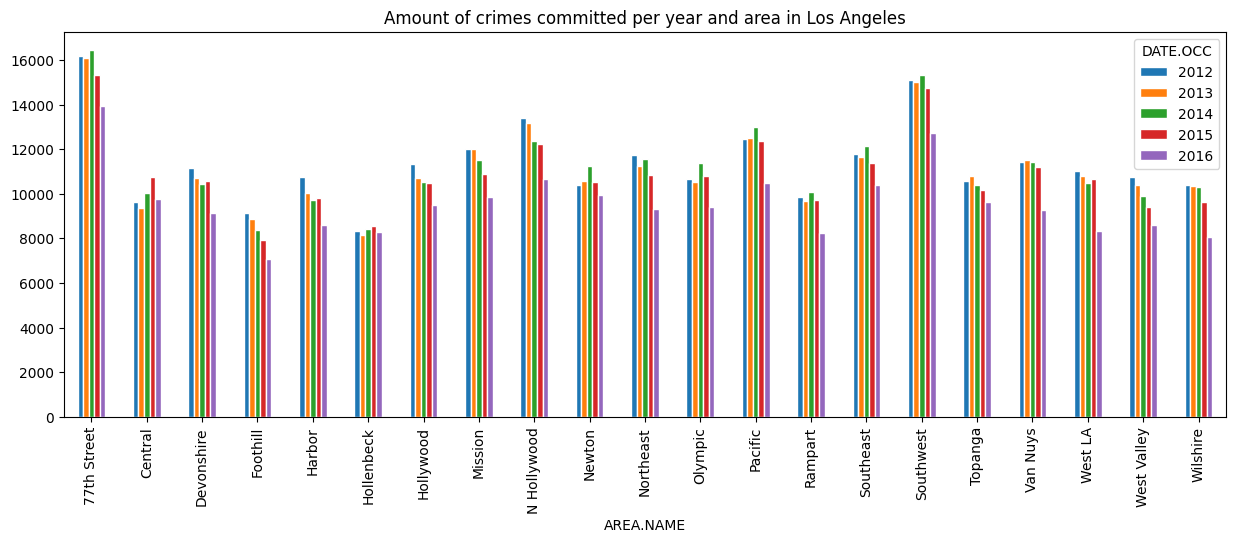

In [39]:
import datetime

# Create dataset with year instead of date
data_with_year = data_sorted_by_date_occ.copy()
data_with_year['DATE.OCC'] = data_with_year['DATE.OCC'].dt.year

only_date_and_area = data_with_year[['AREA.NAME','DATE.OCC','DR.NO']]
only_date_and_area.groupby(['AREA.NAME','DATE.OCC'])['DR.NO'].count().unstack('DATE.OCC').plot(kind='bar', title='Amount of crimes committed per year and area in Los Angeles', width=0.5, edgecolor='white', linewidth=1, figsize=(15, 5))

In [40]:
from sklearn import tree
import pandas as pd
import graphviz 
import pydotplus

# Eventuell musst du cl_fit durch den Namen des Objektes ersetzen, welches du in Aufgabe 6 erstellt hast.
class_names = [str(c) for c in model.classes_] 
dot_data = tree.export_graphviz(model, out_file=None, feature_names=features, class_names= class_names , filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
# Ab hier ergänzen, sodass 'graph' einmal als PNG-Bild und einmal als PDF gesichert wird

graph.write_png("decTree.png")
graph.write_pdf("decTree.pdf")

InvocationException: GraphViz's executables not found

In [ ]:
print(class_names)

['110', '113', '121', '122', '210', '220', '230', '231', '235', '236', '237', '250', '251', '310', '320', '330', '331', '341', '343', '345', '347', '349', '350', '351', '352', '353', '354', '410', '420', '421', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '440', '441', '442', '443', '444', '445', '446', '450', '451', '452', '470', '471', '473', '474', '475', '480', '485', '487', '510', '520', '622', '623', '624', '625', '626', '627', '647', '648', '649', '651', '652', '653', '654', '660', '661', '662', '664', '666', '668', '670', '740', '745', '753', '755', '756', '760', '761', '762', '763', '805', '806', '810', '812', '813', '814', '815', '820', '821', '822', '830', '840', '845', '850', '860', '865', '870', '880', '882', '884', '886', '888', '890', '900', '901', '902', '903', '910', '920', '921', '922', '924', '928', '930', '931', '932', '933', '940', '942', '943', '944', '946', '948', '949', '950', '951', '952', '954', '956', '997']
